In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"diabetes.csv")

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [3]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

#training
start_time_train = time.time()
model.fit(X_train, y_train)
end_time_train = time.time()
train_duration = end_time_train - start_time_train

#testing
start_time_test = time.time()
y_pred = model.predict(X_test)
end_time_test = time.time()
test_duration = end_time_test - start_time_test

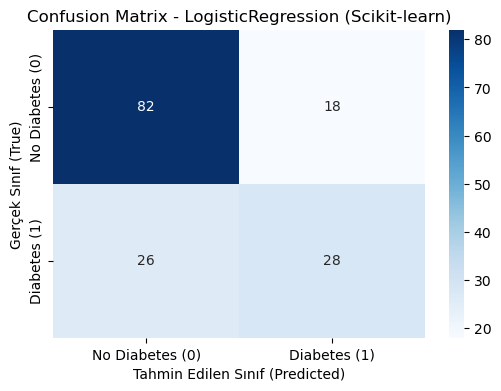

Test Accuracy: 0.7143
Train Time: 0.0260 saniye
Test Time: 0.0015 saniye


In [4]:
test_accuracy = accuracy_score(y_test, y_pred)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ["No Diabetes (0)", "Diabetes (1)"]
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix - LogisticRegression (Scikit-learn)")
plt.ylabel("Gerçek Sınıf (True)")
plt.xlabel("Tahmin Edilen Sınıf (Predicted)")
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Time: {train_duration:.4f} saniye")
print(f"Test Time: {test_duration:.4f} saniye")